<h1>Quick Sort</h1>

In [1]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [98]:
def partition(myList, start, end):
    pivot = myList[start]
    left = start+1
    right = end
    done = False
    while not done:
        while left <= right and myList[left] <= pivot:
            left = left + 1
        while myList[right] >= pivot and right >=left:
            right = right -1
        if right < left:
            done= True
        else:
            temp=myList[left]
            myList[left]=myList[right]
            myList[right]=temp
    temp=myList[start]
    myList[start]=myList[right]
    myList[right]=temp
    return right


def quicksort(myList, start, end):
    if start < end:
        split = partition(myList, start, end)
        quicksort(myList, start, split-1)
        quicksort(myList, split+1, end)
    return myList


In [99]:
B = [7,2,5,1,29,6,4,19,11]
print B
quicksort(B,0,len(B)-1)
print B


[7, 2, 5, 1, 29, 6, 4, 19, 11]
[1, 2, 4, 5, 6, 7, 11, 19, 29]


<h2>Correctitud</h2>

Invariante: Luego de cada iteracion podemos decir que el pivote esta ubicado en una posicion donde los numeros a su derecha son mayores y los de la izquierda menores


In [95]:
def invariant(myList, posPivo):
    pivot = myList[posPivo]
    print "Lista de elementos luego de iteracion:", myList
    print "Pivote:", pivot
    print "Posicion del pivote:", posPivo
    i=0
    while myList[i]<pivot and i<posPivo:
        i=i+1
    i=i+1    
    while i<len(myList) and myList[i]>pivot:
        i=i+1
    
    if i==len(myList):
        print "Elementos de la derecha mayores y de la izquierda menores"
    return i==len(myList)

Algoritmo de quickSort incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [96]:
def partition_invariant(myList, start, end):
    print "Lista de elementos sin iteracion:", myList
    pivot = myList[start]
    left = start+1
    right = end
    done = False
    while not done:
        while left <= right and myList[left] <= pivot:
            left = left + 1
        while myList[right] >= pivot and right >=left:
            right = right -1
        if right < left:
            done= True
        else:
            temp=myList[left]
            myList[left]=myList[right]
            myList[right]=temp
    temp=myList[start]
    myList[start]=myList[right]
    myList[right]=temp
    print invariant(myList,right)
    return right


def quicksort_invariant(myList, start, end):
    if start < end:
        split = partition_invariant(myList, start, end)
        quicksort_invariant(myList, start, split-1)
        quicksort_invariant(myList, split+1, end)
    return myList

In [97]:
B = [7,2,5,1,29,6,4,19,11]
print B
quicksort_invariant(B,0,len(B)-1)
print B

[7, 2, 5, 1, 29, 6, 4, 19, 11]
Lista de elementos sin iteracion: [7, 2, 5, 1, 29, 6, 4, 19, 11]
Lista de elementos luego de iteracion: [6, 2, 5, 1, 4, 7, 29, 19, 11]
Pivote: 7
Posicion del pivote: 5
Elementos de la derecha mayores y de la izquierda menores
True
Lista de elementos sin iteracion: [6, 2, 5, 1, 4, 7, 29, 19, 11]
Lista de elementos luego de iteracion: [4, 2, 5, 1, 6, 7, 29, 19, 11]
Pivote: 6
Posicion del pivote: 4
Elementos de la derecha mayores y de la izquierda menores
True
Lista de elementos sin iteracion: [4, 2, 5, 1, 6, 7, 29, 19, 11]
Lista de elementos luego de iteracion: [1, 2, 4, 5, 6, 7, 29, 19, 11]
Pivote: 4
Posicion del pivote: 2
Elementos de la derecha mayores y de la izquierda menores
True
Lista de elementos sin iteracion: [1, 2, 4, 5, 6, 7, 29, 19, 11]
Lista de elementos luego de iteracion: [1, 2, 4, 5, 6, 7, 29, 19, 11]
Pivote: 1
Posicion del pivote: 0
Elementos de la derecha mayores y de la izquierda menores
True
Lista de elementos sin iteracion: [1, 2, 4, 5

<h2>Análisis del tiempo de ejecución</h2>

In [4]:
class Counter:
    
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def partition_cont(myList, start, end,cont):
    cont.count()
    pivot = myList[start]
    cont.count()
    left = start+1
    cont.count()
    right = end
    cont.count()
    done = False
    cont.count()
    while not done:
        cont.count()
        while left <= right and myList[left] <= pivot:
            cont.count()
            left = left + 1
            cont.count()
        while myList[right] >= pivot and right >=left:
            cont.count()
            right = right -1
            cont.count()
        if right < left:
            cont.count()
            done= True
            cont.count()
        else:
            cont.count()
            temp=myList[left]
            cont.count()
            myList[left]=myList[right]
            cont.count()
            myList[right]=temp
            cont.count()
    temp=myList[start]
    cont.count()
    myList[start]=myList[right]
    cont.count()
    myList[right]=temp
    cont.count()
    return right


def quicksort_cont(myList, start, end,cont):
    cont.count()
    if start < end:
        cont.count()
        split = partition_cont(myList, start, end,cont)
        cont.count()
        quicksort_cont(myList, start, split-1,cont)
        cont.count()
        quicksort_cont(myList, split+1, end,cont)
        cont.count()
    return myList

In [100]:
B = np.random.permutation(range(0,10))
acct = Counter()
quicksort_cont(B,0,len(B)-1, acct)
acct.print_steps()

Number of steps = 146


<h2>Análisis experimental</h2>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [101]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        quicksort_cont(l,0,len(l)-1, acct)
        results.append(acct.steps)
    return results

In [102]:
print exper_analysis(10)

[1, 1, 20, 22, 64, 71, 80, 106, 114, 145]


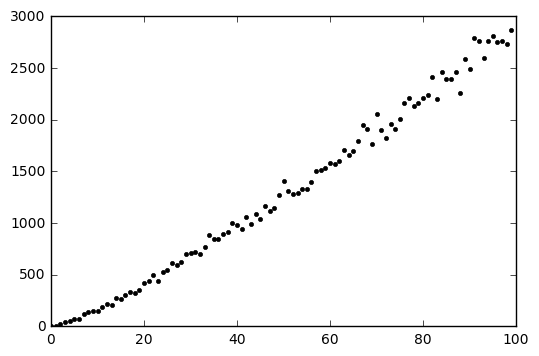

In [103]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

<h2>Tiempo de Ejecucion</h2>

In [104]:
import time
import random as rnd
def time_analysis(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        t_inicial=time.clock()
        quicksort(l,0,len(l)-1)
        t_final= time.clock()
        t_total=t_final-t_inicial
        results.append(t_total*10000000)
    return results

In [105]:
print time_analysis(10)

[19.864351088472176, 3.310724423499778, 36.417982300918084, 39.72870217694435, 49.660884542390704, 39.72870672441786, 102.63248896080768, 89.38959126680857, 92.70031569030834, 82.7681378723355]


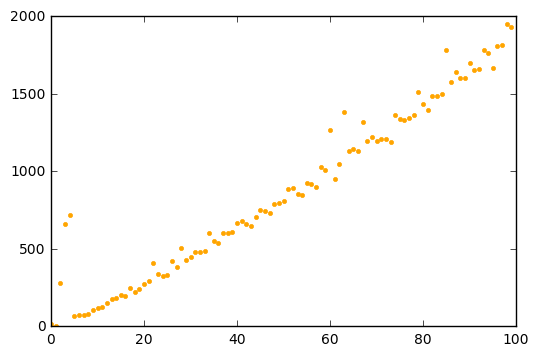

In [106]:
pl.clf()
x = np.arange(100)
y = np.array(time_analysis(100))
pl.plot(x, y, 'k.',color='orange')

<h2>Analisis Teorico</h2>

In [107]:
from math import log
def teoric_analysis(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        i=i*i
        results.append(i)
    return results

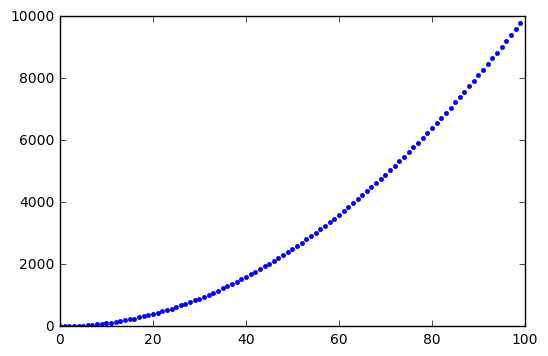

In [108]:
pl.clf()
x = np.arange(100)
y = np.array(teoric_analysis(100))
pl.plot(x, y, 'k.',color='blue')

<h1>Gráficas juntas</h1>

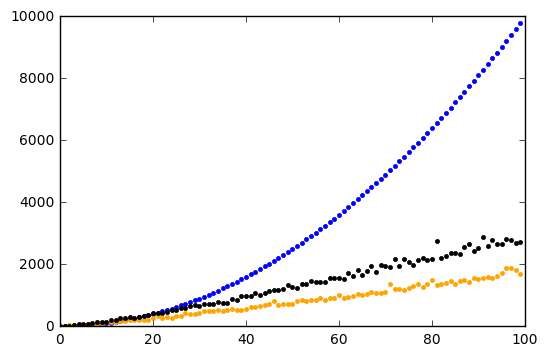

In [109]:
pl.clf()
x = np.arange(100)
y = np.array(teoric_analysis(100))
pl.plot(x, y, 'k.',color='blue')
x = np.arange(100)
y = np.array(time_analysis(100))
pl.plot(x, y, 'k.',color='orange') #Variable multiplicada por una constante muy grande
x = np.arange(100)
y = np.array(exper_analysis(100))   
pl.plot(x, y, 'k.')